In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
print(df.isnull().sum())
df = pd.get_dummies(df, drop_first=True)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [4]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


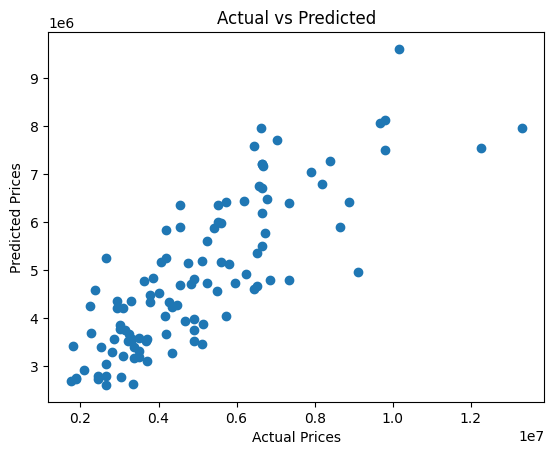

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_pred = poly_model.predict(X_test)

print("Polynomial Regression R²:", r2_score(y_test, poly_pred))

Polynomial Regression R²: 0.6208412814091815


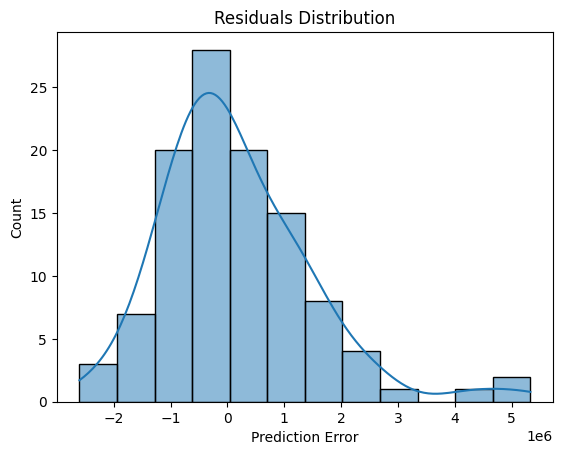

In [9]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.show()

In [10]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

,Feature,Coefficient
2,bathrooms,1.094445e+06
9,airconditioning_yes,7.914267e+05
8,hotwaterheating_yes,6.846499e+05
10,prefarea_yes,6.298906e+05
12,furnishingstatus_unfurnished,-4.136451e+05
3,stories,4.074766e+05
7,basement_yes,3.902512e+05
5,mainroad_yes,3.679199e+05
6,guestroom_yes,2.316100e+05
4,parking,2.248419e+05


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)